In [1]:
#機械学習帳Chap4
#Reference:https://chokkan.github.io/mlnote/regression/04sgd.html

In [2]:
include("../src/linear_regression.jl")
include("../src/gradient_descent.jl")
include("../src/stochastic_gradient_descent.jl")
include("../src/ridge_regression.jl")
using LinearAlgebra
using Printf
using Plots

In [3]:
let
    # data
    xs = [1, 3, 6, 8]
    ys = [3, 6, 5, 7]
    X = [x^j for x in xs, j = 0:1]
    X_T = transpose(X)
    
    ϵ = 1e-4
    vabs(grad) = sum(abs.(grad))
    
    # 最急降下法による推定
    ∇L(w) =  2 * X_T * (X*w - ys)
    ηconst(t) = 0.001 #学習率は固定
    w_gd = gradient_descent(∇L, [0,0], ηconst, ϵ, 10_000, vabs)
    println("GD :W=$w_gd")
    
    # 最小二乗法による推定
    w_ols = linear_regression(X, ys)
    println("OLS:W=$w_ols")
    
    # 確率的勾配降下法による推定
    ∇Li(i,w) = 2 * (dot(X[i,:],w) - ys[i]) * X[i,:]
    η(t) = 0.03 / sqrt(1+t)
    w_sgd = stochastic_gradient_descent(∇Li, length(xs), [0,0], η, ϵ, 40_000, vabs)
    println("SGD:W=$w_sgd")
end

GD :W=[3.310303082536587, 0.4310413781314173]
OLS:W=[3.310344827586208, 0.43103448275862055]
SGD:W=[3.299862857457936, 0.42747548451296724]


 (SGD) w=[0.4268380894214191, 2.2028908001048806, -4.0739107603263385, -2.7065763640351705, -0.7517283880935469, 0.5619339926564901, 1.2054221837338575, 1.3539108113221574, 1.1753403321306048, 0.7954733673633168]
 (OLS) w=[0.144365324207931, 5.926088060684052, -11.524269753211659, -4.076047682531812, 2.258765507966641, 4.794332308291377, 4.49458100986269, 2.4737527970865623, -0.48331679000892624, -3.8798975829642934]


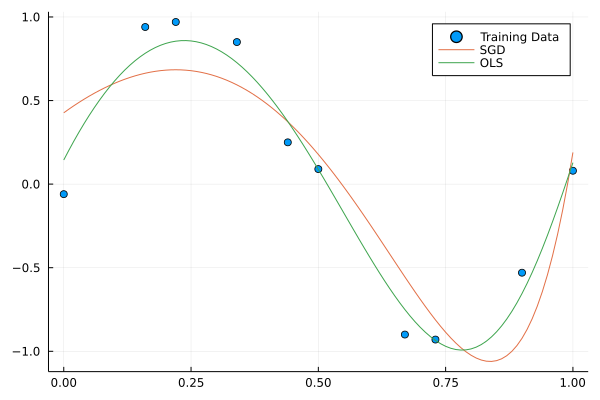

In [4]:
let
    xs = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
    ys = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
    α = 10^(-3)
    Dim = 9
    X = [x^j for x in xs, j = (0:Dim)]

    #確率的勾配降下法
    N = length(ys)
    ∇Li(α,i,w) = 2 * ((dot(X[i,:],w)-ys[i])*X[i,:] + α*w/N)
    η(t) = 1/(sqrt(1+t))
    vabs(grad) = sum(abs.(grad))
    ϵ = 1e-4
    w_sgd = stochastic_gradient_descent((i,w)->∇Li(α,i,w), N, zeros(Dim+1), η, ϵ, 50_000, vabs)
    println(" (SGD) w=$w_sgd")
    
    #最小二乗法
    w_ols = ridge_regression(X, ys, α)
    println(" (OLS) w=$w_ols")
    
    #グラフ描画
    scatter(xs, ys, label="Training Data")
    f(x,w) = sum([x^(j-1) * w[j] for j = (1:length(w))])
    plot!((0.0:0.01:1.0), x->f(x,w_sgd), label="SGD")
    plot!((0.0:0.01:1.0), x->f(x,w_ols), label="OLS")
end